In [1]:
# Team 3
# Anirban Mukherjee
# Manjusha Chava
# Tae Hyun Je  
# 11/11/2020

In [2]:
# importing comms libraries
import numpy as np
import matplotlib.pyplot as plt
from commpy.filters import rcosfilter, rrcosfilter
import scipy.interpolate

[-6.60231965e+00  1.32046393e+00 -1.88637704e-01 -6.28792348e-02
  2.85814704e-02  1.53900225e-02 -9.23401350e-03 -5.97494991e-03
  4.08812362e-03  2.92008830e-03 -2.15832614e-03 -2.13870499e-03
  2.89354205e-03  4.05095886e-03 -5.92063218e-03 -9.15006792e-03
  1.52501132e-02  2.83216388e-02 -6.23076054e-02 -1.86922816e-01
  1.30845971e+00 -6.54229856e+00]


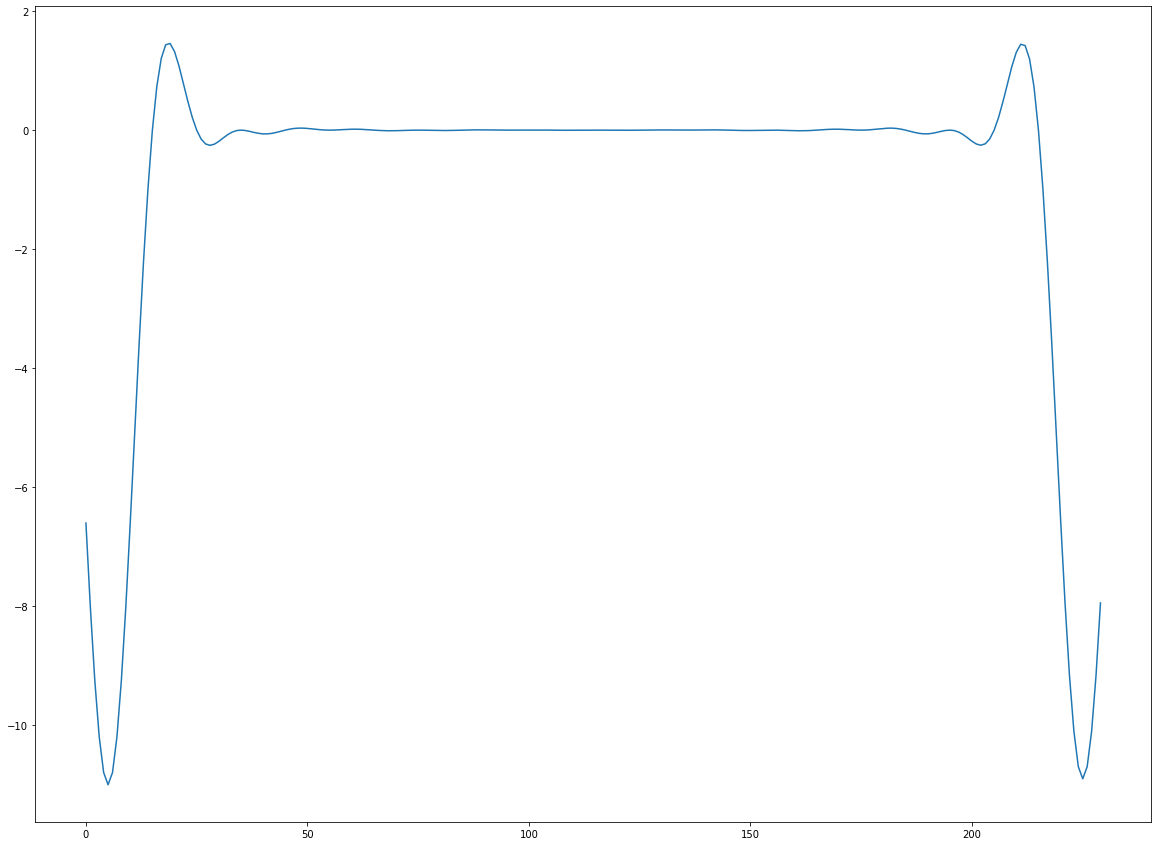

In [20]:
# Question 1

# Define raised cosine pulse shape
time, impulse_resp = rcosfilter(220,0.5,1,10)

# Create transmission using raised cosine shape
# Upsampling 
N = 220
d_upsample = np.zeros((N*N,))

d_upsample[::N] = time  #impulse train, every 220th sample is ith element of d

sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[105:335] # gets elements 105-335

# Sample the received waveform to 
# extract out of it the desired values
index = np.arange(10,230,10)
d_hat1 = sig1[index]
print(d_hat1)

# Plot graph
plt.figure(figsize=(20,15))
plt.plot(sig1)
plt.show()